In [54]:
import torch
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from model import Koala

In [71]:
filename1 = "images/color/beach-00.png"
rgb = io.imread(filename1)
lab = color.rgb2lab(rgb)
lab = np.moveaxis(lab, 2, 0)
print(lab.shape)
print(lab[1:3].shape)

min(lab[1].flatten()), max(lab[1].flatten())

(3, 256, 256)
(2, 256, 256)


(-4.919716636706872, 4.03861067762834)

In [38]:
filename2 = "images/gray/beach-00.png"
gray = io.imread(filename2,as_gray=True)
gray

array([[131, 130, 139, ..., 112, 105, 101],
       [147, 138, 138, ..., 108, 103, 101],
       [155, 151, 148, ..., 107, 103, 100],
       ...,
       [126, 128, 111, ..., 191, 145, 101],
       [132, 137, 108, ..., 119,  84,  94],
       [145, 131, 137, ...,  93, 101,  93]], dtype=uint8)

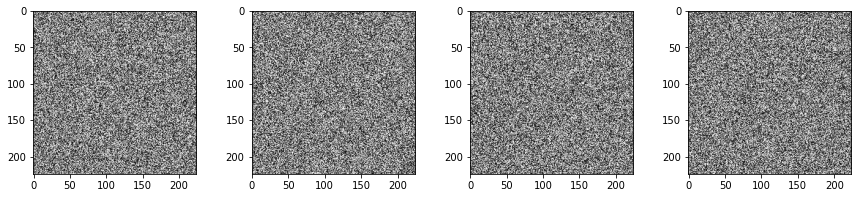

In [64]:
model = Koala()
arr = torch.rand((4, 1, 224, 224))
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
for i, pic in enumerate(arr):
    ax[i].imshow(pic.movedim(0, 2), cmap="gray")

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


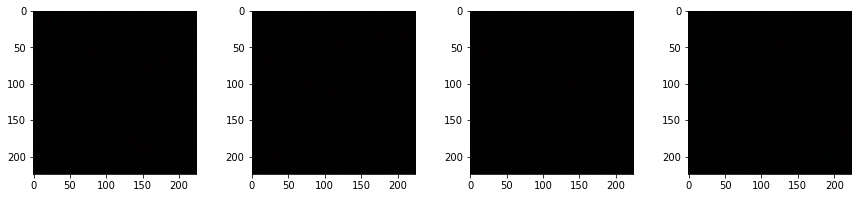

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(15, 3))
for i, pic in enumerate(model(arr)):
    pic = torch.cat((arr[i], pic))
    pic=pic.movedim(0, 2)
    pic = color.lab2rgb(pic.detach().numpy())
    print(pic.shape)
    ax[i].imshow(pic,)